- Ensemble learning helps improve machine learning results by combining several models.
- this approach allows the production of better predictive performance compared to a single model
- Bagging and Boosting are two main types of ensemble learning                 
- ensemble can give you a boost in accuracy on your dataset

**Three most popular methods for combining the predictions from different models are:**
- Bagging: Building multiple models (typically of the same type) from different subsamples of the training dataset
- Boosting: Building multiple models (typically of the same type) each of which learns to fix the prediction errors of a prior model in the chain
- Voting Building multiple models (typically of different types) and simple statistics (like calculating the mean) are used to combine predictions 

**Bagging Algorithms**
- Bootstrap Aggregation or Bagging involves taking multiple samples from your training dataset (with replcaement) and training a model for each sample.
- The final output prediction is averaged(or voting) across the predictions of all the sub-models 

Three main Bagging models:
1. Bagged Decision Tree
2. Random Forest
3. Extra trees

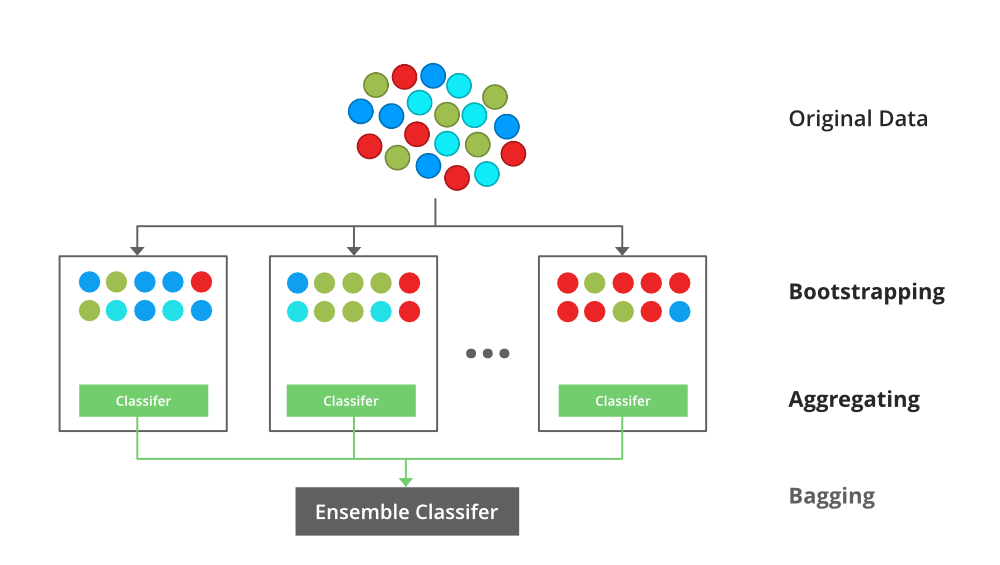

- Pasting : When random subsets of the dataset are drawn as random subsets of the samples, then this algorithm is known as Pasting
- Bagging : If the samples are drawn with replacement, then the method is known as Bagging
- Random Subspaces : When random subsets of the dataset are drawn as random subsets of the features, then the method is known as Random Subspaces
- Random Patches : Finally, base estiimators are built on subsets of both samples and features, then the method is known as Random Patches

**Boosting Algorithms**
- Boosting algorithms work on the idea of first building a model on the training dataset and then building a second model to correct the faults of the first model
- This technique is repeated until the mistakes are reduced and the dataset is accurately predicted
- Boosting algorithms Boosting algorithms fuction similarly in that they combine numerous models(weak learners) to produce the final result(strong learners)

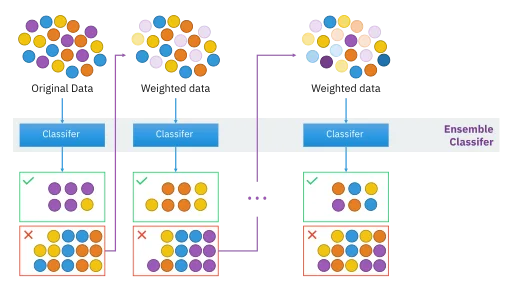

**There are three kinds of Boosting models:**               
1. AdaBoost algorithm
2. Gradient Descent algorithm
3. Xtreme Gradient Descent algorithm

**AdaBoost Algorithm**
- This approach constructs a model and assigns equal weights to all data points.
- It then applies larger weights to incorrectly categorized points
- In the following model

**Algortihm**
- Initialize the dataset and assign equal weight to each of the data point
- Provide this as input to the model and identifyt he wrongly classified data points
- Increase the weight of the wrongly classified data points and decrease the weights of correctly classified data points. nd then normalize the weights of all data points.
- if (got required results)
    - goto step 5
- else
    - goto step 2
- End

In [25]:
import pandas as pd

In [27]:
df=pd.read_csv(r"C:\Users\PHANEENDRA\Downloads\Cranes ML\diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [29]:
x=df.drop(columns='Outcome')
y=df['Outcome']

In [35]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [45]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [47]:
dt.score(xtrain,ytrain)

1.0

In [49]:
dt.score(xtest,ytest)

0.7272727272727273

# Random Forest Classifier

In [53]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(xtrain,ytrain)

RandomForestClassifier()

In [55]:
rfc.score(xtrain,ytrain)

1.0

In [57]:
rfc.score(xtest,ytest)

0.8181818181818182

# Bagging Classifier

In [96]:
from sklearn.ensemble import BaggingClassifier
bag=BaggingClassifier()
bag.fit(xtrain,ytrain)

BaggingClassifier()

In [98]:
bag.score(xtrain,ytrain)

0.9706840390879479

In [100]:
bag.score(xtest,ytest)

0.7662337662337663

In [112]:
params_bag = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 0.7, 1.0]
    # 'max_features': [0.5, 0.7, 1.0],
    # 'bootstrap': [True, False],
    # 'bootstrap_features': [False, True],
    # 'estimator__max_depth': [3, 5, 7]
}

In [114]:
from sklearn.model_selection import GridSearchCV
grid_bag=GridSearchCV(estimator=bag,param_grid=params_bag,scoring='accuracy')
grid_bag.fit(xtrain,ytrain)

GridSearchCV(estimator=BaggingClassifier(),
             param_grid={'max_samples': [0.5, 0.7, 1.0],
                         'n_estimators': [10, 50, 100]},
             scoring='accuracy')

In [116]:
grid_bag.best_params_

{'max_samples': 0.5, 'n_estimators': 100}

In [118]:
grid_bag.best_score_

0.7540317206450753

In [122]:
final_bag=BaggingClassifier(max_samples=0.5,n_estimators=100)
final_bag.fit(xtrain,ytrain)

BaggingClassifier(max_samples=0.5, n_estimators=100)

In [124]:
final_bag.score(xtrain,ytrain)

0.9446254071661238

In [126]:
final_bag.score(xtest,ytest)

0.8181818181818182

In [128]:
# here we can see the test accuracy is improved after grid search

# AdaBoost Classifier

In [150]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()
ada.fit(xtrain,ytrain)

AdaBoostClassifier()

In [152]:
ada.score(xtrain,ytrain)

0.7882736156351792

In [154]:
ada.score(xtest,ytest)

0.7792207792207793

In [157]:
params_ada = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
    # 'estimator__max_depth': [1, 2, 3]
}

In [159]:
grid_ada=GridSearchCV(ada,params_ada)
grid_ada.fit(xtrain,ytrain)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1.0],
                         'n_estimators': [50, 100, 200]})

In [161]:
grid_ada.best_params_

{'learning_rate': 0.1, 'n_estimators': 100}

In [163]:
grid_ada.best_score_

0.7556843929095028

In [165]:
final_ada=AdaBoostClassifier(learning_rate=0.1,n_estimators=100)
final_ada.fit(xtrain,ytrain)

AdaBoostClassifier(learning_rate=0.1, n_estimators=100)

In [167]:
final_ada.score(xtrain,ytrain)

0.7768729641693811

In [169]:
final_ada.score(xtest,ytest)

0.7792207792207793

# Gradient Boosting Classifier

In [78]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier()
grad.fit(xtrain,ytrain)

GradientBoostingClassifier()

In [80]:
grad.score(xtrain,ytrain)

0.9153094462540716

In [82]:
grad.score(xtest,ytest)

0.8051948051948052